### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints1/",exist_ok=True)
os.makedirs("checkpoints2/",exist_ok=True)
os.makedirs("checkpoints3/",exist_ok=True)
os.makedirs("checkpoints4/",exist_ok=True)
checkpoint_path = "checkpoints1/weights.{epoch:02d}.hdf5"
checkpoint_path2 = "checkpoints2/weights.{epoch:02d}.hdf5"
checkpoint_path3 = "checkpoints3/weights.{epoch:02d}.hdf5"
checkpoint_path4 = "checkpoints4/weights.{epoch:02d}.hdf5"
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [3]:
# Determine the number of unique values in each column.
print(application_df.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts for binning
apptype_counts = application_df['APPLICATION_TYPE'].value_counts()
apptype_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

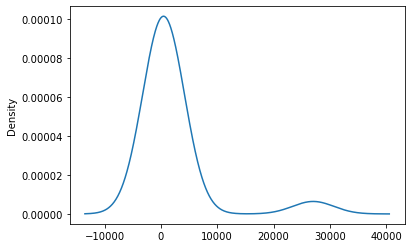

In [5]:
# Visualize the value counts of APPLICATION_TYPE
apptype_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_apptypes = list(apptype_counts[apptype_counts < 200].index)

# Replace in DataFrame
for apptype in replace_apptypes:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(apptype,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
pd.set_option('display.max_rows', 20)
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

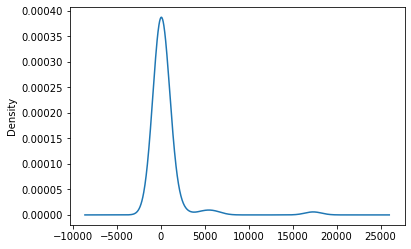

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
app_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
app_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[app_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(app_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(app_cat,1)
application_df.head()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values #1 means columns.

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
#The number of hidden neurons should be 2/3 the size of the input layer, 
#plus the size of the output layer. The number of hidden neurons should be 
#less than twice the size of the input layer.
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
tf.keras.backend.clear_session()
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


2022-01-27 09:57:30.531933: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
y_train.size

25724

In [26]:
# Create a callback that saves the model's weights every 5 epochs
BATCH_SIZE = 35
STEPS_PER_EPOCH = y_train.size / BATCH_SIZE
SAVE_PERIOD = 5

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=int(SAVE_PERIOD * STEPS_PER_EPOCH))

In [28]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 996us/step - loss: 0.5332 - accuracy: 0.7418
Epoch 2/100
804/804 [==============================] - 1s 999us/step - loss: 0.5351 - accuracy: 0.7417
Epoch 3/100
804/804 [==============================] - 1s 991us/step - loss: 0.5338 - accuracy: 0.7420
Epoch 4/100
762/804 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7409
Epoch 00004: saving model to checkpoints/weights.04.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7419
Epoch 5/100
804/804 [==============================] - 1s 991us/step - loss: 0.5328 - accuracy: 0.7423
Epoch 6/100
804/804 [==============================] - 1s 992us/step - loss: 0.5335 - accuracy: 0.7419
Epoch 7/100
804/804 [==============================] - 1s 998us/step - loss: 0.5332 - accuracy: 0.7416
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7414
Epoch 9/100
401/804 [=============>...

804/804 [==============================] - 1s 988us/step - loss: 0.5340 - accuracy: 0.7423
Epoch 63/100
804/804 [==============================] - 1s 992us/step - loss: 0.5322 - accuracy: 0.7421
Epoch 64/100
288/804 [=========>....................] - ETA: 0s - loss: 0.5393 - accuracy: 0.7357
Epoch 00064: saving model to checkpoints/weights.64.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7422
Epoch 65/100
804/804 [==============================] - 1s 999us/step - loss: 0.5336 - accuracy: 0.7427
Epoch 66/100
804/804 [==============================] - 1s 989us/step - loss: 0.5324 - accuracy: 0.7419
Epoch 67/100
804/804 [==============================] - 1s 994us/step - loss: 0.5324 - accuracy: 0.7422
Epoch 68/100
714/804 [=========================>....] - ETA: 0s - loss: 0.5328 - accuracy: 0.7419
Epoch 00068: saving model to checkpoints/weights.68.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7424
Epoch

In [29]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5758 - accuracy: 0.7244 - 262ms/epoch - 976us/step
Loss: 0.5757759213447571, Accuracy: 0.7244315147399902


In [30]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_try1.h5")

In [214]:
### Deliverable 3: Optimize the Model

In [31]:
application_df['STATUS'].value_counts()
# STATUS seems useless

1    34294
0        5
Name: STATUS, dtype: int64

In [32]:
application_df_new = application_df.drop(columns=['STATUS'])

# Split our preprocessed data into our features and target arrays
y = application_df_new["IS_SUCCESSFUL"].values
X = application_df_new.drop(["IS_SUCCESSFUL"],1).values #1 means columns.

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

                                        

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
#The number of hidden neurons should be 2/3 the size of the input layer, 
#plus the size of the output layer. The number of hidden neurons should be 
#less than twice the size of the input layer.
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10 # added 3rd layer
tf.keras.backend.clear_session()
nn = tf.keras.models.Sequential()

def my_leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.01)

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=my_leaky_relu)
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=my_leaky_relu))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=my_leaky_relu))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3440      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,191
Trainable params: 6,191
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Create a callback that saves the model's weights every 5 epochs
BATCH_SIZE = 35
STEPS_PER_EPOCH = y_train.size / BATCH_SIZE
SAVE_PERIOD = 5

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path2,
    verbose=1,
    save_weights_only=True,
    save_freq=int(SAVE_PERIOD * STEPS_PER_EPOCH))

In [36]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5740 - accuracy: 0.7212
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7297
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5509 - accuracy: 0.7308
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5496 - accuracy: 0.7324
Epoch 5/100
428/804 [==============>...............] - ETA: 0s - loss: 0.5461 - accuracy: 0.7340
Epoch 00005: saving model to checkpoints2/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7338
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5476 - accuracy: 0.7338
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5467 - accuracy: 0.7348
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7346
Epoch 9/100
804/804 [============================

804/804 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7407
Epoch 64/100
779/804 [============================>.] - ETA: 0s - loss: 0.5369 - accuracy: 0.7399
Epoch 00064: saving model to checkpoints2/weights.64.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5369 - accuracy: 0.7399
Epoch 65/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 0.7411
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5367 - accuracy: 0.7407
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7402
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 0.7408
Epoch 69/100
431/804 [===============>..............] - ETA: 0s - loss: 0.5366 - accuracy: 0.7402
Epoch 00069: saving model to checkpoints2/weights.69.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5364 - accuracy: 0.7410
Epoch 70/100


In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5573 - accuracy: 0.7259 - 239ms/epoch - 893us/step
Loss: 0.5573054552078247, Accuracy: 0.7259474992752075


In [222]:
# accuracy still < .75

In [38]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_try2.h5")

In [39]:
askamt_counts = application_df['ASK_AMT'].value_counts()
pd.set_option('display.max_rows', 10000)
askamt_counts = askamt_counts.sort_index()
askamt_counts


5000          25398
5001              1
5006              2
5016              1
5037              1
5040              1
5044              1
5050              1
5052              1
5058              1
5059              1
5064              1
5073              1
5112              1
5113              1
5114              1
5130              2
5133              1
5147              1
5149              1
5170              2
5175              2
5179              2
5180              1
5202              1
5208              1
5213              1
5218              1
5228              1
5255              2
5285              1
5293              1
5297              2
5301              1
5308              1
5315              1
5332              1
5334              1
5345              1
5349              1
5353              1
5366              1
5372              1
5381              1
5384              1
5388              1
5389              1
5391              1
5398              1
5410              1


<AxesSubplot:ylabel='Density'>

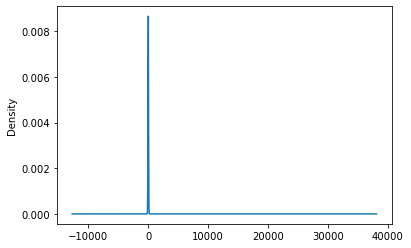

In [40]:
askamt_counts.plot.density()

In [46]:
# Determine which values to replace if askamnt are less than ...?
replace_askamt = list(askamt_counts[askamt_counts < 4].index)
application_df_new2 = application_df_new
# Replace in DataFrame
for askamt in replace_askamt:
    application_df_new2['ASK_AMT'] = application_df_new2['ASK_AMT'].replace(askamt,">5000")

# Check to make sure binning was successful
application_df_new2['ASK_AMT'].value_counts()

5000     25398
>5000     8901
Name: ASK_AMT, dtype: int64

In [47]:
# Convert ask_amt to categorical
import numpy as np
application_df_new2 = application_df_new2.astype({'ASK_AMT': object})
application_df_new2['ASK_AMT_5000'] = np.where(application_df_new2['ASK_AMT']!= '>5000', 1, 0)
application_df_new2['ASK_AMT_>5000'] = np.where(application_df_new2['ASK_AMT']== '>5000', 1, 0)


In [48]:
application_df_new2 = application_df_new2.drop(columns = 'ASK_AMT')
application_df_new2

,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_5000,ASK_AMT_>5000
0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
2,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
3,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
34295,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
34296,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
34297,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0


In [49]:
# Split our preprocessed data into our features and target arrays
y = application_df_new2["IS_SUCCESSFUL"].values
X = application_df_new2.drop(["IS_SUCCESSFUL"],1).values #1 means columns.

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
#The number of hidden neurons should be 2/3 the size of the input layer, 
#plus the size of the output layer. The number of hidden neurons should be 
#less than twice the size of the input layer.
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10 # added 3rd layer
tf.keras.backend.clear_session()
nn = tf.keras.models.Sequential()

#def my_leaky_relu(x):
 #   return tf.nn.leaky_relu(x, alpha=0.01)

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu')
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
# Create a callback that saves the model's weights every 5 epochs
BATCH_SIZE = 35
STEPS_PER_EPOCH = y_train.size / BATCH_SIZE
SAVE_PERIOD = 5

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path3,
    verbose=1,
    save_weights_only=True,
    save_freq=int(SAVE_PERIOD * STEPS_PER_EPOCH))

In [53]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5689 - accuracy: 0.7207
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7319
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5510 - accuracy: 0.7306
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5490 - accuracy: 0.7329
Epoch 5/100
443/804 [===============>..............] - ETA: 0s - loss: 0.5431 - accuracy: 0.7369
Epoch 00005: saving model to checkpoints3/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5478 - accuracy: 0.7333
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5477 - accuracy: 0.7349
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5466 - accuracy: 0.7346
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7353
Epoch 9/100
804/804 [============================

Epoch 63/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7406
Epoch 64/100
766/804 [===========================>..] - ETA: 0s - loss: 0.5347 - accuracy: 0.7411
Epoch 00064: saving model to checkpoints3/weights.64.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7406
Epoch 65/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7406
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5344 - accuracy: 0.7403
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7406
Epoch 68/100
804/804 [==============================] - 1s 998us/step - loss: 0.5348 - accuracy: 0.7414
Epoch 69/100
403/804 [==============>...............] - ETA: 0s - loss: 0.5297 - accuracy: 0.7443
Epoch 00069: saving model to checkpoints3/weights.69.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.740

In [54]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5581 - accuracy: 0.7252 - 240ms/epoch - 896us/step
Loss: 0.5581228733062744, Accuracy: 0.7252478003501892


In [235]:
#accuracy still < 75

In [55]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_try3.h5")

In [56]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# try adding more neurons, different activation function

number_input_features = len(X_train[0])
#The number of hidden neurons should be 2/3 the size of the input layer, 
#plus the size of the output layer. The number of hidden neurons should be 
#less than twice the size of the input layer.
hidden_nodes_layer1 = 2000
hidden_nodes_layer2 = 800
hidden_nodes_layer3 = 300 # added 3rd layer
tf.keras.backend.clear_session()
nn = tf.keras.models.Sequential()

#def my_leaky_relu(x):
 #   return tf.nn.leaky_relu(x, alpha=0.01)

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='tanh')


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='gelu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='gelu'))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

SyntaxError: invalid syntax (3463091619.py, line 23)

In [57]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [58]:
# Create a callback that saves the model's weights every 5 epochs
BATCH_SIZE = 35
STEPS_PER_EPOCH = y_train.size / BATCH_SIZE
SAVE_PERIOD = 5

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path4,
    verbose=1,
    save_weights_only=True,
    save_freq=int(SAVE_PERIOD * STEPS_PER_EPOCH))

In [59]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7411
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5325 - accuracy: 0.7417
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7416
Epoch 4/100
804/804 [==============================] - 1s 985us/step - loss: 0.5326 - accuracy: 0.7414
Epoch 5/100
453/804 [===============>..............] - ETA: 0s - loss: 0.5363 - accuracy: 0.7373
Epoch 00005: saving model to checkpoints4/weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5328 - accuracy: 0.7411
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5329 - accuracy: 0.7415
Epoch 7/100
804/804 [==============================] - 1s 994us/step - loss: 0.5324 - accuracy: 0.7410
Epoch 8/100
804/804 [==============================] - 1s 987us/step - loss: 0.5322 - accuracy: 0.7408
Epoch 9/100
804/804 [======================

804/804 [==============================] - 1s 989us/step - loss: 0.5310 - accuracy: 0.7420
Epoch 63/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5309 - accuracy: 0.7418
Epoch 64/100
770/804 [===========================>..] - ETA: 0s - loss: 0.5305 - accuracy: 0.7416
Epoch 00064: saving model to checkpoints4/weights.64.hdf5
804/804 [==============================] - 1s 998us/step - loss: 0.5313 - accuracy: 0.7414
Epoch 65/100
804/804 [==============================] - 1s 986us/step - loss: 0.5313 - accuracy: 0.7418
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7419
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5309 - accuracy: 0.7415
Epoch 68/100
804/804 [==============================] - 1s 990us/step - loss: 0.5312 - accuracy: 0.7419
Epoch 69/100
397/804 [=============>................] - ETA: 0s - loss: 0.5304 - accuracy: 0.7403
Epoch 00069: saving model to checkpoints4/weights.

In [60]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5690 - accuracy: 0.7251 - 242ms/epoch - 903us/step
Loss: 0.5689640641212463, Accuracy: 0.7251312136650085


In [242]:
# Accuracy still < 75%

In [61]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_try4.h5")